In [7]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day12\Datasets")
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
milk = pd.read_csv("milk.csv",index_col=0)

In [11]:
milk.head(3)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18


In [14]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

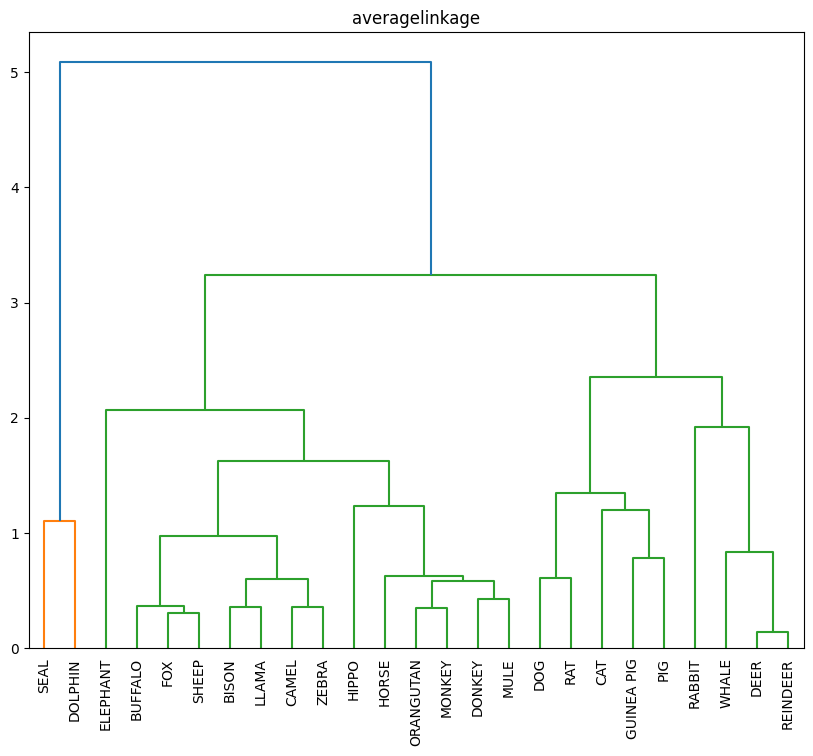

In [26]:
link = 'average'
mergings = linkage(milk_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(milk_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


In [18]:
type(mergings)

numpy.ndarray

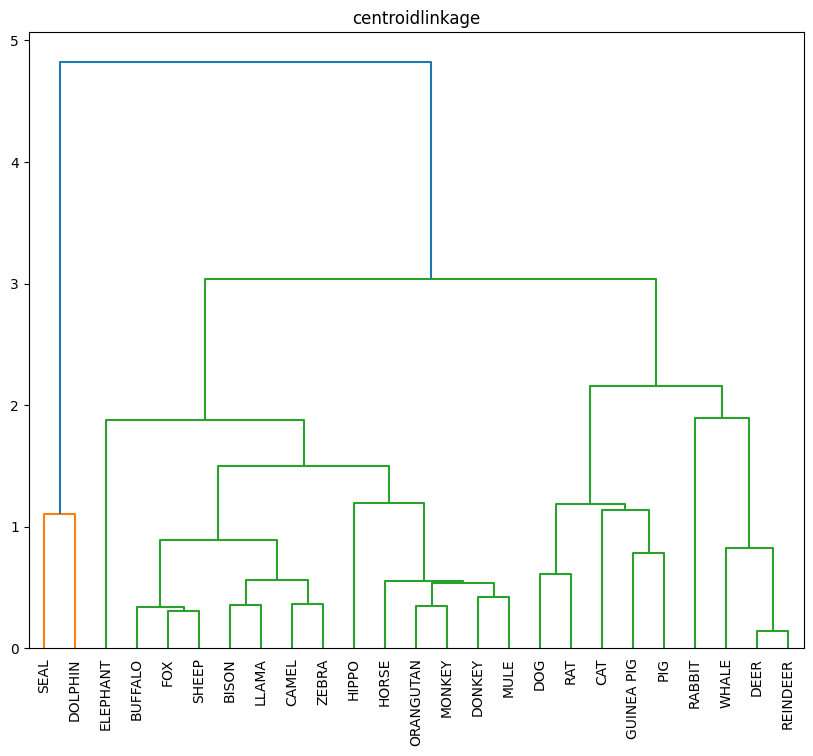

In [28]:
link = 'centroid'
mergings = linkage(milk_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(milk_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


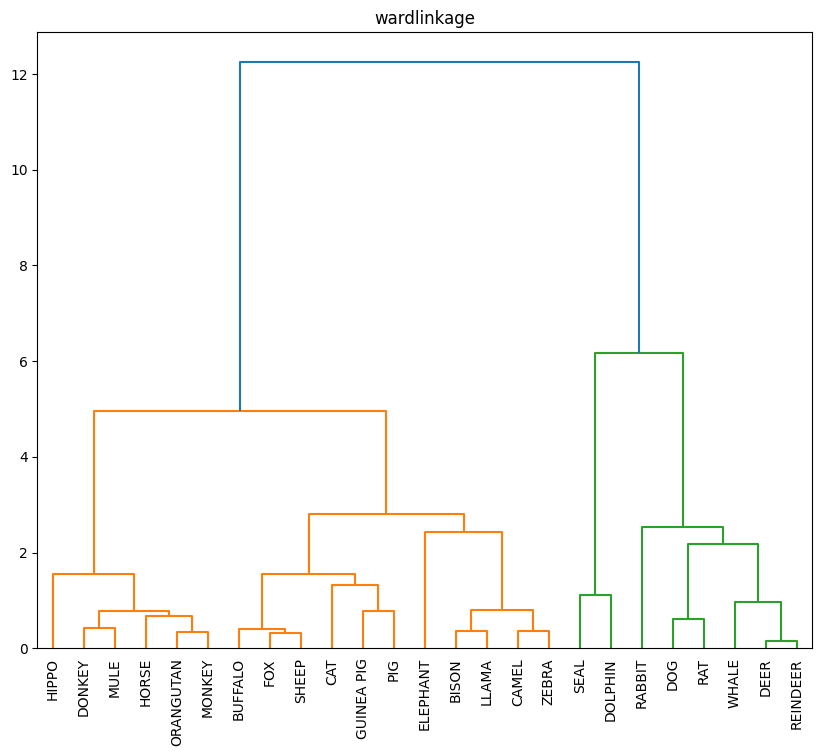

In [30]:
link = 'ward'
mergings = linkage(milk_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(milk_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


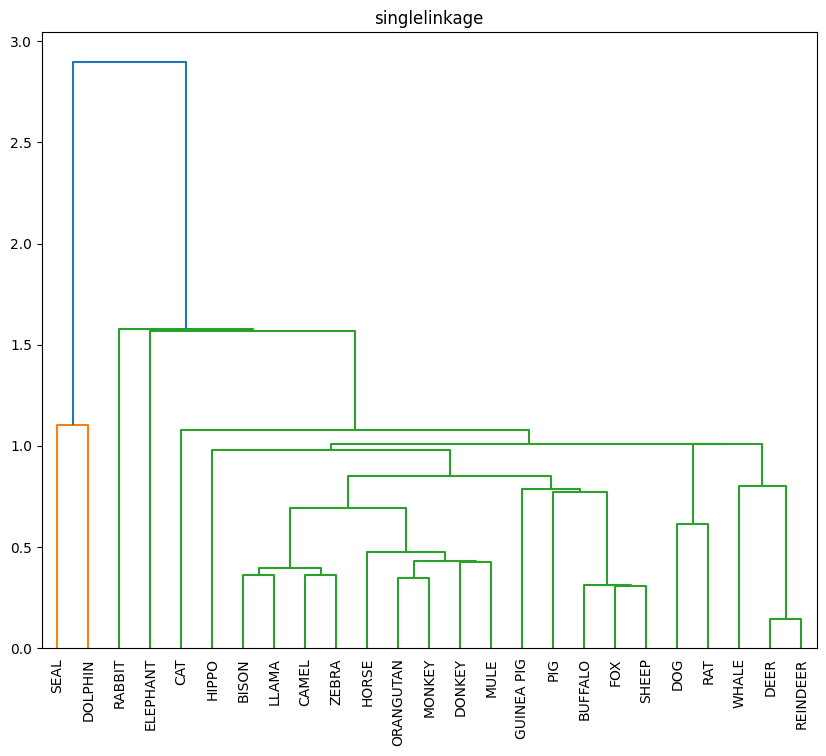

In [32]:
link = 'single'
mergings = linkage(milk_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(milk_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


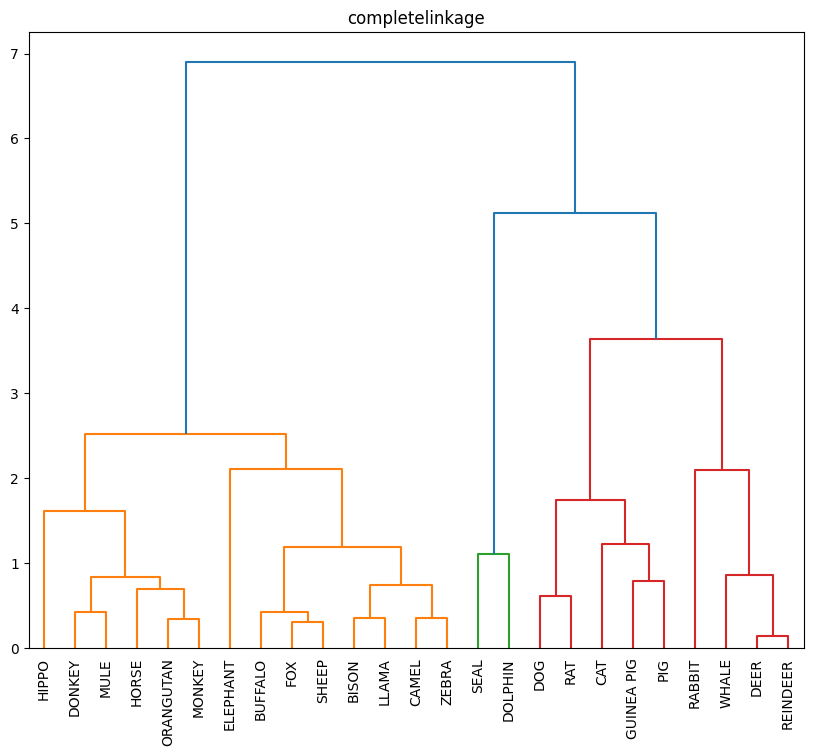

In [34]:
link = 'complete'
mergings = linkage(milk_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(milk_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


In [71]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [73]:
silhouette_score(milk_scaled,clust.labels_) ## bigger the better the clustering

0.5186847578981009

In [38]:
milk_scaled.index

Index(['HORSE', 'ORANGUTAN', 'MONKEY', 'DONKEY', 'HIPPO', 'CAMEL', 'BISON',
       'BUFFALO', 'GUINEA PIG', 'CAT', 'FOX', 'LLAMA', 'MULE', 'PIG', 'ZEBRA',
       'SHEEP', 'DOG', 'ELEPHANT', 'RABBIT', 'RAT', 'DEER', 'REINDEER',
       'WHALE', 'SEAL', 'DOLPHIN'],
      dtype='object', name='Animal')

In [42]:
df_clust = pd.DataFrame({'Animal':list(milk_scaled.index), 'cluster':list(clust.labels_)} )

In [44]:
df_clust.sort_values('cluster')

,Animal,cluster
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
16,DOG,0
8,GUINEA PIG,0
9,CAT,0
13,PIG,0
24,DOLPHIN,1


## Evaluate silhouette scores for different number of clusters

In [79]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled, clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best no. of Clusters:",n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.41601538367376095, 0.3830100222472541, 0.37428423003570394]
Best no. of Clusters: 2


In [81]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [83]:
df_clust = pd.DataFrame({'Animal':list(milk_scaled.index), 'cluster':list(clust.labels_)} )

In [85]:
df_clust.sort_values('cluster')

,Animal,cluster
0,HORSE,0
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
17,ELEPHANT,0
16,DOG,0
15,SHEEP,0
14,ZEBRA,0


## US Arrest Dataset

In [88]:
arrest = pd.read_csv('USArrests.csv',index_col=0)

In [90]:
arrest.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [92]:
scaler = StandardScaler().set_output(transform='pandas')
arrest_scaled = scaler.fit_transform(arrest)

In [122]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(arrest_scaled)
    scores.append(silhouette_score(arrest_scaled, clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best Silhouette Score:", scores[i_max])
print("Best no. of Clusters:", n_clust[i_max])

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339]
Best Silhouette Score: 0.4084890326217641
Best no. of Clusters: 2


In [128]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(arrest_scaled)
clust.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [130]:
silhouette_score(arrest_scaled, clust.labels_)

0.4084890326217641

In [132]:
df_clust1 = pd.DataFrame({'States':list(arrest_scaled.index), 'cluster':list(clust.labels_)} )

In [134]:
df_clust1.sort_values('cluster')

,States,cluster
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0


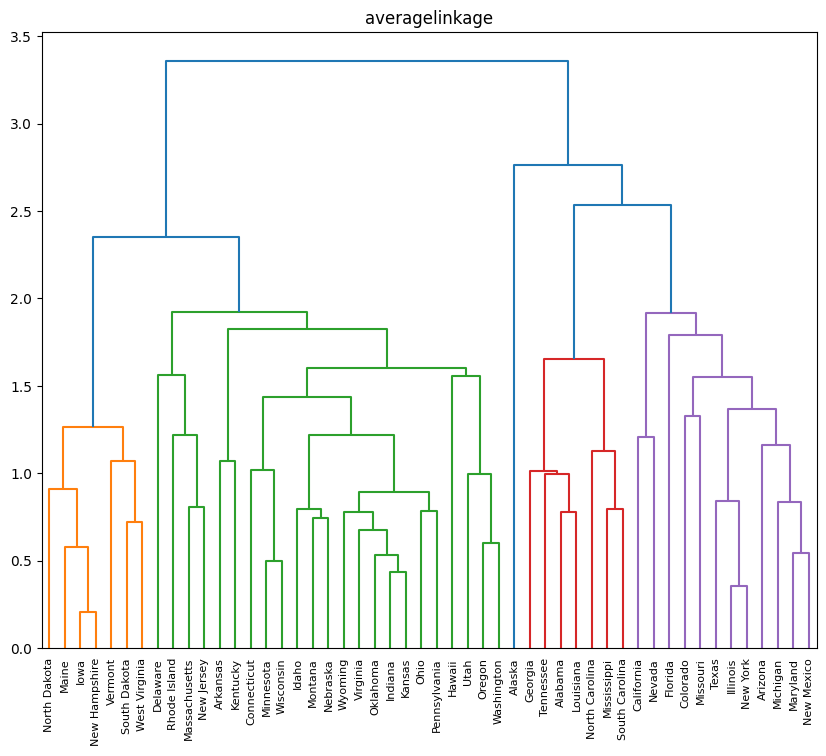

In [136]:
link = 'average'
mergings = linkage(arrest_scaled, method= link) ## calculations are happening here
plt.figure(figsize=(10,8))
dendrogram(mergings, labels= list(arrest_scaled.index))
plt.title(link+"linkage")
plt.xticks(rotation=90)
plt.show()


In [140]:
from sklearn.cluster import DBSCAN

In [142]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(arrest_scaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2: ## length of the set should be greater than 2 for silhoutte score 
            cnt = cnt + 1
            arrest_scaled['Clust'] = clust_DB.labels_
            arrest_scl_inliers = arrest_scaled[arrest_scaled['Clust']!=-1]## filtering the outliers
            sil_sc = silhouette_score(arrest_scl_inliers.iloc[:,:-1],# dataframe # last column not consider
                             arrest_scl_inliers.iloc[:,-1])# label # the last column
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
    
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


0.4 2 0.9294801120696734
0.6 2 0.4598846166598499
0.6 3 0.7189015458613475
1 2 0.11526083405519487
1 3 0.11526083405519487
1 4 0.21075699219922683
1 5 0.22417529426027302
Best Paramters:


,Sr,eps,min_pt,sil
0,1.0,0.4,2.0,0.92948


In [148]:
len(arrest_scaled[arrest_scaled['Clust'] == -1])

31

In [154]:
len(arrest_scaled['Clust'])

50

## Cluster Analysis

In [171]:
clust_DB = DBSCAN(eps = 0.4 , min_samples=2)
clust_DB.fit(arrest_scaled.iloc[:,:4])


DBSCAN(eps=0.4, min_samples=2)

In [174]:
arrest_clust = arrest.copy()

In [180]:
arrest_clust['cluster'] = clust_DB.labels_
arrest_clust  = arrest_clust[arrest_clust['cluster'] != -1]
arrest_clust.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.75,251.5,84.5,25.05
1,2.15,56.5,56.5,10.40


In [182]:
print(clust_DB.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]


In [184]:
arrest_clust.sort_values('cluster')

,Murder,Assault,UrbanPop,Rape,cluster
Illinois,10.4,249,83,24.0,0
New York,11.1,254,86,26.1,0
Iowa,2.2,56,57,11.3,1
New Hampshire,2.1,57,56,9.5,1


In [186]:
arrest

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


## Nutrient.csv

In [189]:
nut = pd.read_csv('nutrient.csv',index_col=0)

In [193]:
nut.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [195]:
scaler = StandardScaler().set_output(transform='pandas')
nut_scaled = scaler.fit_transform(nut)

In [248]:
eps_range = [0.2,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(nut_scaled.iloc[:,:5])
        if len(set(clust_DB.labels_)) > 2: ## length of the set should be greater than 2 for silhoutte score 
            cnt = cnt + 1
            nut_scaled['clust'] = clust_DB.labels_
            nut_inliers = nut_scaled[nut_scaled['clust']!=-1]## filtering the outliers
            sil_sc = silhouette_score(nut_inliers.iloc[:,:-1],# dataframe # last column not consider
                             nut_inliers.iloc[:,-1])# label # the last column
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
    
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


0.2 2 0.8762504566761466
0.4 2 0.7583703251542814
0.6 2 0.6093740531983721
1 2 0.36227346913953085
1 3 0.35399685742327974
Best Paramters:


,Sr,eps,min_pt,sil
0,1.0,0.2,2.0,0.87625


## Clustering Analysis

In [251]:
clust_DB = DBSCAN(eps = 0.4 , min_samples=2)
clust_DB.fit(nut_scaled)


DBSCAN(eps=0.4, min_samples=2)

In [253]:
nut_clust = nut.copy()
nut_clust['cluster'] = clust_DB.labels_
nut_clust  = nut_clust[nut_clust['cluster'] != -1]
nut_clust.groupby('cluster').mean()

,energy,protein,fat,calcium,iron
cluster,,,,,
0,340.0,20.0,28.0,9.0,2.55
1,170.0,25.0,7.0,9.5,1.35
2,347.5,19.0,29.5,9.0,2.45


In [255]:
clust_DB.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0,  2,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1], dtype=int64)